In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np

In [3]:
## set read/write paths for easy access

review_path = 'data/raw_reviews.csv'

review_df = pd.read_csv(review_path)
review_df['playtime_at_review_minutes'] = review_df['playtime_at_review_minutes'].astype('int')
review_df.head()
print(review_df.shape)

(69015, 18)


In [4]:
review_df["playtime_at_review_minutes"].where(review_df["playtime_at_review_minutes"] == "playtime_at_review_minutes")

cleaned_review = review_df[
    review_df["playtime_at_review_minutes"].apply(lambda x: x != "playtime_at_review_minutes")
    ]

cleaned_review.to_csv('data/raw_reviews.csv', mode='w')

In [5]:
agg_df = (
    review_df
    .groupby("Appname")
    .agg(
        {'playtime_at_review_minutes': ['mean', 'median'], 'playtime_forever_minutes': ['mean', 'median'], }
        )
    )

agg_df.head()



playtime_at_review_minutes           \
                                             mean   median   
Appname                                                      
7 Days to Die                        31795.163333  11978.5   
A Total War Saga: TROY                4401.680000   1548.5   
ARC Raiders                           3870.993333   2682.0   
ARK: Survival Ascended               21793.676667   4909.0   
Abiotic Factor                        6989.826667   5555.0   

                       playtime_forever_minutes           
                                           mean   median  
Appname                                                   
7 Days to Die                      32179.503333  12624.5  
A Total War Saga: TROY              6923.216667   2734.0  
ARC Raiders                         3933.150000   2754.5  
ARK: Survival Ascended             22834.700000   6079.5  
Abiotic Factor                      7137.993333   5600.0

In [6]:
agg_df.columns

MultiIndex([('playtime_at_review_minutes',   'mean'),
            ('playtime_at_review_minutes', 'median'),
            (  'playtime_forever_minutes',   'mean'),
            (  'playtime_forever_minutes', 'median')],
           )

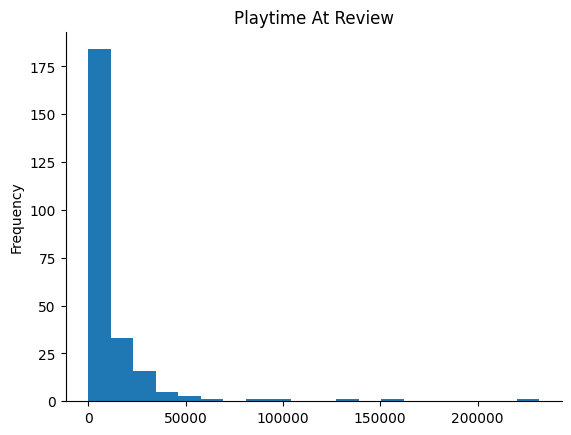

In [7]:
## visualize age
from matplotlib import pyplot as plt
agg_df[('playtime_at_review_minutes',   'mean')].plot(kind='hist', bins=20, title='Playtime At Review')
plt.gca().spines[['top', 'right',]].set_visible(False)

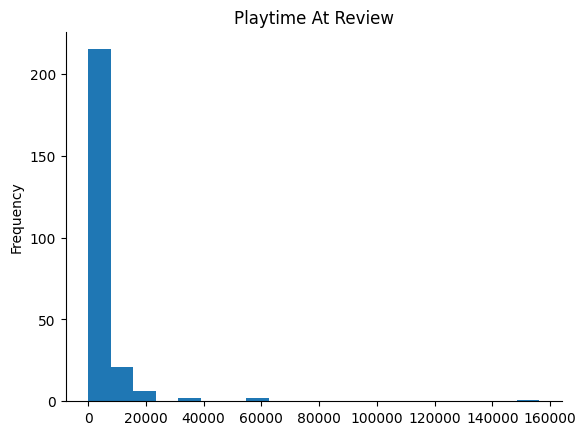

In [8]:
## visualize age
from matplotlib import pyplot as plt
agg_df[('playtime_at_review_minutes',   'median')].plot(kind='hist', bins=20, title='Playtime At Review')
plt.gca().spines[['top', 'right',]].set_visible(False)

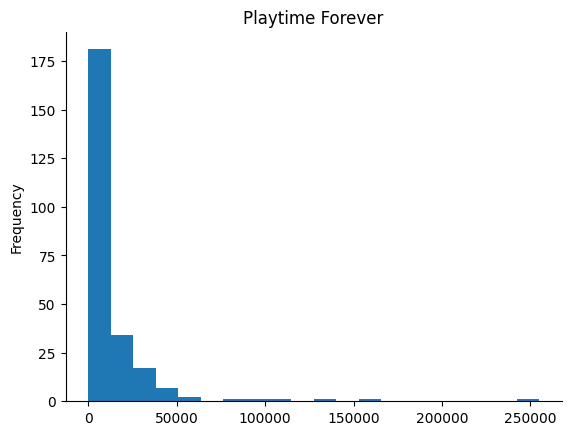

In [9]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'mean')].plot(kind='hist', bins=20, title='Playtime Forever')
plt.gca().spines[['top', 'right',]].set_visible(False)

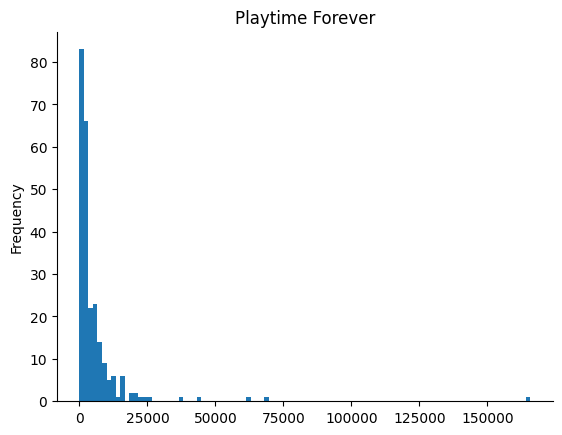

In [22]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'median')].plot(kind='hist', bins=100, title='Playtime Forever')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
agg_df["minutes_mean_diff"] = agg_df[('playtime_forever_minutes',   'mean')] - agg_df[('playtime_at_review_minutes',   'mean')]

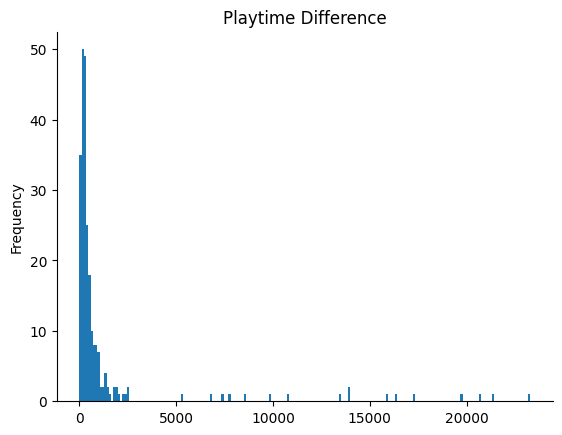

In [21]:
from matplotlib import pyplot as plt
agg_df["minutes_mean_diff"].plot(kind='hist', bins=200, title='Playtime Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
agg_df["minutes_median_diff"] = agg_df[('playtime_forever_minutes',   'median')] - agg_df[('playtime_at_review_minutes',   'median')]

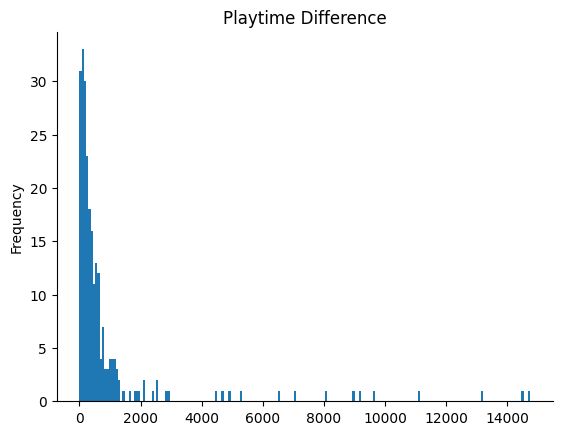

In [14]:
from matplotlib import pyplot as plt
agg_df["minutes_median_diff"].plot(kind='hist', bins=200, title='Playtime Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

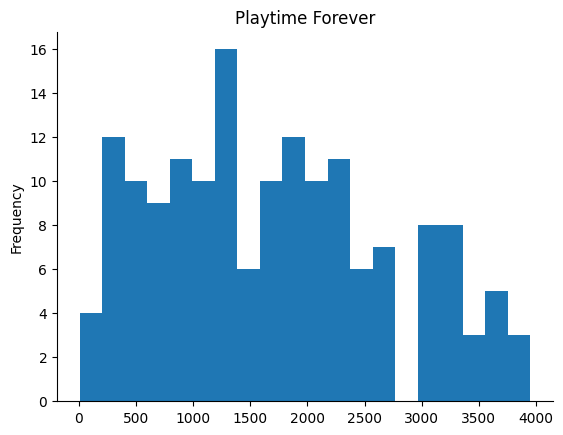

In [15]:
from matplotlib import pyplot as plt
agg_df[('playtime_forever_minutes',   'median')][
    agg_df[('playtime_forever_minutes',   'median')].apply(lambda x: x < 4000)
    ].plot(kind='hist', bins=20, title='Playtime Forever')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
agg_df[('playtime_forever_minutes',   'median')][
    agg_df[('playtime_forever_minutes',   'median')].apply(lambda x: x > 2400)
    ].shape

(125,)

In [17]:
2400 / 60

40.0

In [18]:
agg_df.shape

(247, 6)

In [19]:
def create_dependent_variable(row):
    if row[('playtime_forever_minutes',   'median')] > 2400:
        val = 1
    else:
        val = 0
    return val

agg_df['long_game'] = agg_df.apply(create_dependent_variable, axis=1)
agg_df.head(5)

playtime_at_review_minutes           \
                                             mean   median   
Appname                                                      
7 Days to Die                        31795.163333  11978.5   
A Total War Saga: TROY                4401.680000   1548.5   
ARC Raiders                           3870.993333   2682.0   
ARK: Survival Ascended               21793.676667   4909.0   
Abiotic Factor                        6989.826667   5555.0   

                       playtime_forever_minutes          minutes_mean_diff  \
                                           mean   median                     
Appname                                                                      
7 Days to Die                      32179.503333  12624.5        384.340000   
A Total War Saga: TROY              6923.216667   2734.0       2521.536667   
ARC Raiders                         3933.150000   2754.5         62.156667   
ARK: Survival Ascended             22834.700000   6079.5       1041.023333   
Abiotic Factor                      7137.993333   5600.0        148.166667   

                       minutes_median_diff long_game  
                                                      
Appname                                               
7 Days to Die                        646.0         1  
A Total War Saga: TROY              1185.5         1  
ARC Raiders                           72.5         1  
ARK: Survival Ascended              1170.5         1  
Abiotic Factor                        45.0         1

In [20]:
app_ids = pd.read_csv('/data/app_ids.csv')
app_ids.head()

FileNotFoundError: [Errno 2] No such file or directory: '/data/app_ids.csv'

In [ ]:
# agg_df[["Appname", "long_game"]]

new_df = pd.merge(left=agg_df["long_game"],
right=app_ids,
left_index=True,
right_on="App Title"
)

new_df.shape
new_df.head()

In [ ]:
new_df.set_index("App ID").head()


In [ ]:
new_df.set_index("App ID").to_csv('/data/y_variable.csv')